# Working with Time Series Data

### sf_temps exercises

In [1]:
import pandas as pd
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
df.asfreq('D')[:10]

,temp
date,
2010-01-01,47.8
2010-01-02,47.9
2010-01-03,48.0
2010-01-04,48.1
2010-01-05,48.0
2010-01-06,48.1
2010-01-07,48.1
2010-01-08,48.0
2010-01-09,48.0


In [5]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

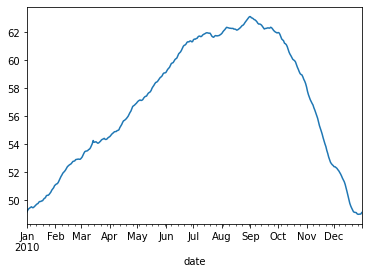

In [6]:
df.resample('D').mean().temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

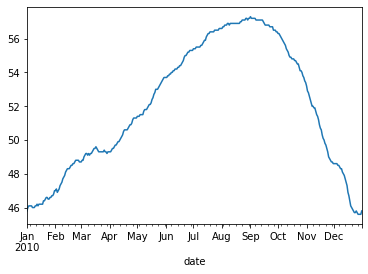

In [7]:
df.resample('D').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

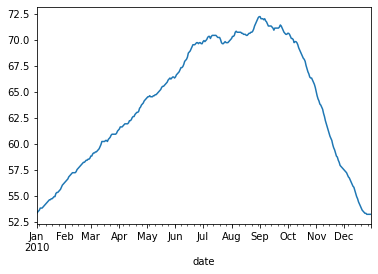

In [8]:
df.resample('D').max().temp.plot()

4. Which month is the coldest, on average?


In [9]:
# resample monthly and use mean for aggregation

df.resample('M').mean().head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [10]:
df.resample('M').mean().min().temp

49.984139784946244

In [11]:
df['avg_monthly_temp'] = df.resample('M').temp.transform('mean')
df.head()

,temp,avg_monthly_temp
date,,
2010-01-01 00:00:00,47.8,49.98414
2010-01-01 01:00:00,47.4,49.98414
2010-01-01 02:00:00,46.9,49.98414
2010-01-01 03:00:00,46.5,49.98414
2010-01-01 04:00:00,46.0,49.98414


In [12]:
lowest_avg_temp = df.resample('M').mean().min().temp

In [13]:
lowest_avg_temp

49.984139784946244

In [14]:
df['month'] = df.index.month_name()
df.head()

,temp,avg_monthly_temp,month
date,,,
2010-01-01 00:00:00,47.8,49.98414,January
2010-01-01 01:00:00,47.4,49.98414,January
2010-01-01 02:00:00,46.9,49.98414,January
2010-01-01 03:00:00,46.5,49.98414,January
2010-01-01 04:00:00,46.0,49.98414,January


In [15]:
coldest_month = df['month'][df['avg_monthly_temp'] == lowest_avg_temp]
coldest_month[1]

'January'

5. Which month has the highest average temperature?

In [16]:
df.resample('M').mean().max().temp

62.48708333333335

In [17]:
highest_avg_temp = df.resample('M').mean().max().temp

In [18]:
hotest_month = df['month'][df['avg_monthly_temp'] == highest_avg_temp]
hotest_month[1]

'September'

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [19]:
df['avg_daily_temp'] = df.resample('D').temp.transform('mean')
df.head()

,temp,avg_monthly_temp,month,avg_daily_temp
date,,,,
2010-01-01 00:00:00,47.8,49.98414,January,49.170833
2010-01-01 01:00:00,47.4,49.98414,January,49.170833
2010-01-01 02:00:00,46.9,49.98414,January,49.170833
2010-01-01 03:00:00,46.5,49.98414,January,49.170833
2010-01-01 04:00:00,46.0,49.98414,January,49.170833


In [20]:
df['max_daily_temp'] = df.resample('D').temp.transform('max')
df['min_daily_temp'] = df.resample('D').temp.transform('min')
df.head()

,temp,avg_monthly_temp,month,avg_daily_temp,max_daily_temp,min_daily_temp
date,,,,,,
2010-01-01 00:00:00,47.8,49.98414,January,49.170833,53.3,45.8
2010-01-01 01:00:00,47.4,49.98414,January,49.170833,53.3,45.8
2010-01-01 02:00:00,46.9,49.98414,January,49.170833,53.3,45.8
2010-01-01 03:00:00,46.5,49.98414,January,49.170833,53.3,45.8
2010-01-01 04:00:00,46.0,49.98414,January,49.170833,53.3,45.8


In [21]:
df['temp_change_per_day'] = df['max_daily_temp'] - df['min_daily_temp']
df.head()

,temp,avg_monthly_temp,month,avg_daily_temp,max_daily_temp,min_daily_temp,temp_change_per_day
date,,,,,,,
2010-01-01 00:00:00,47.8,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 01:00:00,47.4,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 02:00:00,46.9,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 03:00:00,46.5,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 04:00:00,46.0,49.98414,January,49.170833,53.3,45.8,7.5


In [22]:
highest_daily_variability = df.resample('M').mean().temp_change_per_day[1]

In [23]:
highest_daily_variability

9.48571428571432

In [24]:
highest_variability_month = df['month'][df['temp_change_per_day'] == df.temp_change_per_day.max()][1]

In [25]:
highest_variability_month

'August'

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [26]:
import matplotlib.pyplot as plt

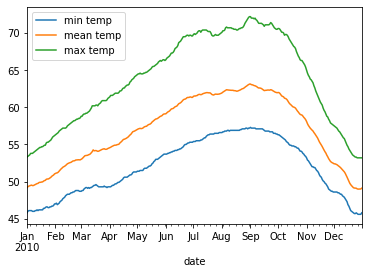

In [27]:
df.resample('D').temp.min().plot(label = 'min temp')
df.resample('D').temp.mean().plot(label = 'mean temp')
df.resample('D').temp.max().plot(label = 'max temp')
plt.legend();

### seattle_weather exercises

In [28]:
import pandas as pd
from vega_datasets import data
seattle = data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

In [29]:
seattle['month'] = seattle.date.dt.month
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [30]:
seattle['year'] = seattle.date.dt.year
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012


In [31]:
seattle['yyyy_mm'] = seattle['date'].dt.to_period('M')
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,year,yyyy_mm
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012,2012-01
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012,2012-01
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012,2012-01
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012,2012-01
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012,2012-01


In [32]:
seattle.precipitation.describe()

count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [33]:
hi_precip = seattle.precipitation.max()

In [34]:
hi_precip

55.9

In [35]:
yyyy_mm_hi_precip = seattle['yyyy_mm'][seattle['precipitation'] == hi_precip]
yyyy_mm_hi_precip

1169    2015-03
Name: yyyy_mm, dtype: period[M]

2. Visualize the amount of monthly precipitation over time.

In [36]:
seattle = seattle.set_index('date').sort_index()

<AxesSubplot:xlabel='date'>

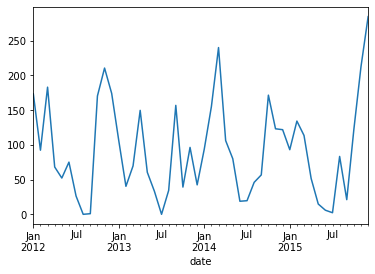

In [37]:
seattle.precipitation.resample('M').sum().plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

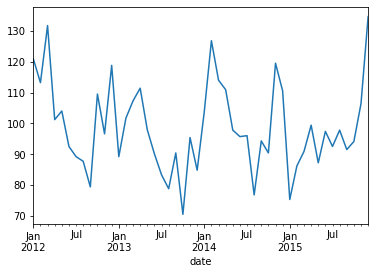

In [38]:
seattle.wind.resample('M').sum().plot()

4. Which year-month combination is the windiest?

In [39]:
hi_wind = seattle.wind.max()

In [40]:
yyyy_mm_hi_wind = seattle['yyyy_mm'][seattle['wind'] == hi_wind]
yyyy_mm_hi_wind

date
2012-12-17    2012-12
Name: yyyy_mm, dtype: period[M]

5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [41]:
seattle['sunny'] = seattle.weather == 'sun' 

In [42]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,yyyy_mm,sunny
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012,2012-01,False
2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012,2012-01,False
2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012,2012-01,False
2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012,2012-01,False
2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012,2012-01,False


In [63]:
seattle.resample('Y').sunny.mean().idxmax().year

2014

6. In which month does it rain the most?

In [64]:
seattle['raining'] = seattle.weather == 'rain' 

In [65]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,yyyy_mm,sunny,raining
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012,2012-01,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012,2012-01,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012,2012-01,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012,2012-01,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012,2012-01,False,True


In [77]:
seattle.resample('M').raining.mean().idxmax().month

11

7. Which month has the most number of days with a non-zero amount of precipitation?

In [71]:
seattle['some_percip'] = seattle.precipitation >0

In [72]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,yyyy_mm,sunny,raining,some_percip
date,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012,2012-01,False,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012,2012-01,False,True,True
2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012,2012-01,False,True,True
2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012,2012-01,False,True,True
2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012,2012-01,False,True,True


In [80]:
seattle.resample('M').some_percip.mean().idxmax().month

12

### data.flights_20k() exercises

In [81]:
import pandas as pd
from vega_datasets import data
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


1. Convert any negative delays to 0.

In [84]:
import numpy as np

flights.delay = np.where(flights.delay < 0, 0, flights.delay)

In [86]:
flights.delay.describe()

count    20000.000000
mean        11.119450
std         23.527015
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        509.000000
Name: delay, dtype: float64

2. Which hour of the day has the highest average delay?

In [89]:
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [93]:
flights.resample('H').delay.mean().idxmax().hour

3

3. Does the day of the week make a difference in the delay amount?

In [95]:
flights['weekday'] = flights.index.day_name()
flights.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday
2001-01-01 06:30:00,0,251,MDW,STL,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,Monday


In [96]:
flights.groupby('weekday').delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

Answer: Yes

4. Does the month make a difference in the delay amount?

In [98]:
flights['month'] = flights.index.month_name()
flights.head()

,delay,distance,origin,destination,weekday,month
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,Monday,January


In [99]:
flights.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

Answer: Yes